#Custmer Segmentation

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [14]:
retail = pd.read_csv('Online_Retail.csv')

In [15]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [16]:
retail.shape

(541909, 8)

In [17]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#Data Cleaning


- Calculating the Missing Value % contribution in DF

In [18]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [19]:
df_null = round(100*(retail.isnull().sum())/len(retail),2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [20]:
retail = retail.dropna()
retail.shape

(406829, 8)

In [21]:
retail['CustomerID'] = retail['CustomerID'].astype(str)

- New Attribute : Monetary

In [22]:
retail['Amount'] = retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


- New Attriute : Frequency

In [24]:
rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


- Merge the Two DataFrames

In [26]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


- New Attribute : Recency
- Convert to datetime to proper datatype

In [27]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format= '%d-%m-%Y %H:%M')
retail['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

- Compute the max date to know the last transaction date
- Compute the diff between max date and transaction date

In [28]:
max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [29]:
retail['Difference'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


- Compute recency of Customer

In [30]:
rfm_p = retail.groupby('CustomerID')['Difference'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Difference
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


- Extract Number of days only

In [31]:
rfm_p['Difference'] = rfm_p['Difference'].dt.days
rfm_p.head()

,CustomerID,Difference
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


- Merge the dataframe to get the final RFM dataframe

In [32]:
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


- Outlier Analysis of Amount Frequency And Recency

Text(0.5, 0, 'Attributes')

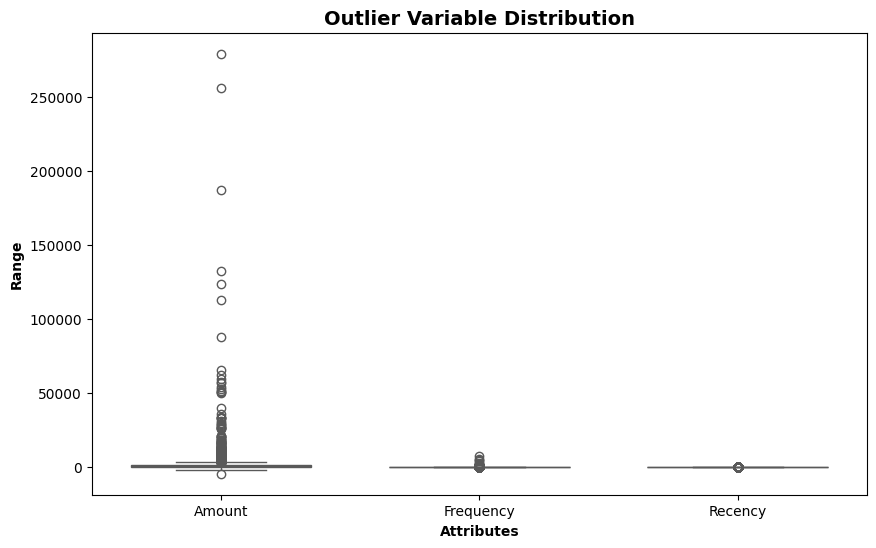

In [33]:
attributes = ['Amount', 'Frequency', 'Recency']
plt.rcParams['figure.figsize'] = [10,6]
sns.boxplot(data=rfm[attributes],orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Outlier Variable Distribution", fontsize = 14, fontweight= 'bold')
plt.ylabel("Range", fontweight= "bold")
plt.xlabel("Attributes", fontweight= 'bold')

- Removing (statistical) outlier for Amount

In [34]:
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

- Removing (statistical) outlier for Recency

In [35]:
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

- Removing (statsitical) outlier for Frequency

In [36]:
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

# Scaling the Features

In [37]:
rfm_df = rfm[['Amount','Frequency','Recency']]
scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [38]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
#rfm_df_scaled
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
#rfm_df_scaled.head()

# Model Building

- k-means with some arbitary k

In [40]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [41]:
kmeans.labels_

array([1, 3, 0, ..., 1, 0, 0])

In [42]:
set(kmeans.labels_)

{0, 1, 2, 3}

 Elbow Curve to get the right number of Clusters

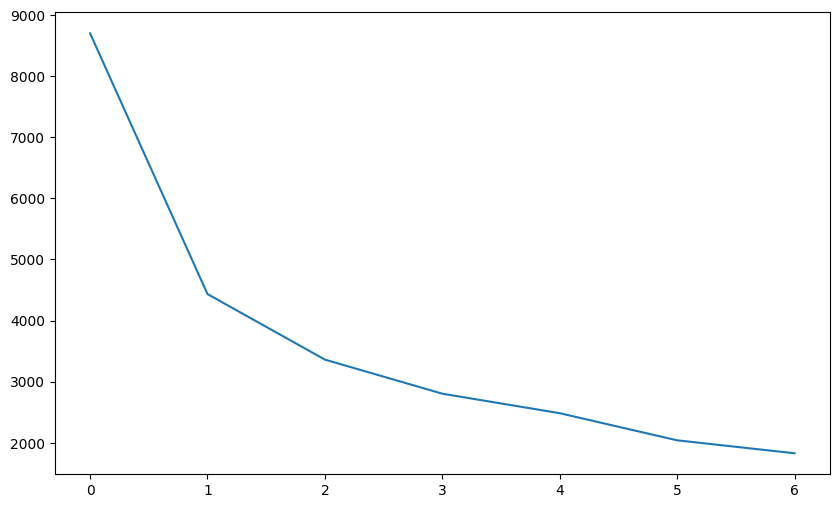

In [43]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

plt.plot(ssd)


- Final Model with k=3

In [44]:
kmeans = KMeans(n_clusters=3,max_iter=300)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=3)

In [45]:
filename = 'kmeans_model.pkl'

import pickle

with open('kmeans_saved_model','wb') as file:
    pickle.dump(kmeans, file)

file.close()

pickle.dump(kmeans, open('kmeans_model.pkl', 'wb'))

In [46]:
kmeans.labels_

array([1, 0, 2, ..., 1, 2, 2])

In [47]:
rfm['Cluster_ID'] = kmeans.predict(rfm_df_scaled)
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_ID
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1


- Boxplot to visualise Cluste ID vs Amoutn

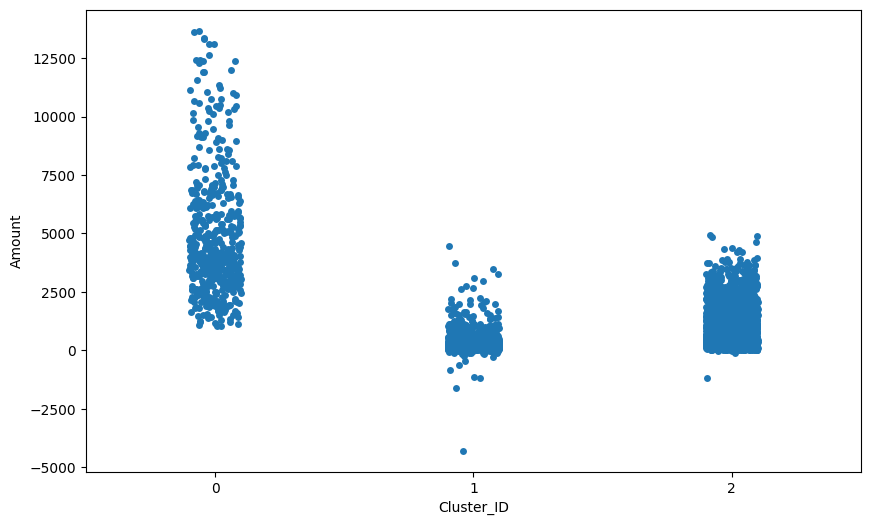

In [48]:
sns.stripplot(x='Cluster_ID', y='Amount', data=rfm)
plt.savefig("stripplota.png")

- Boxplot to visualise Cluster ID vs Frequency

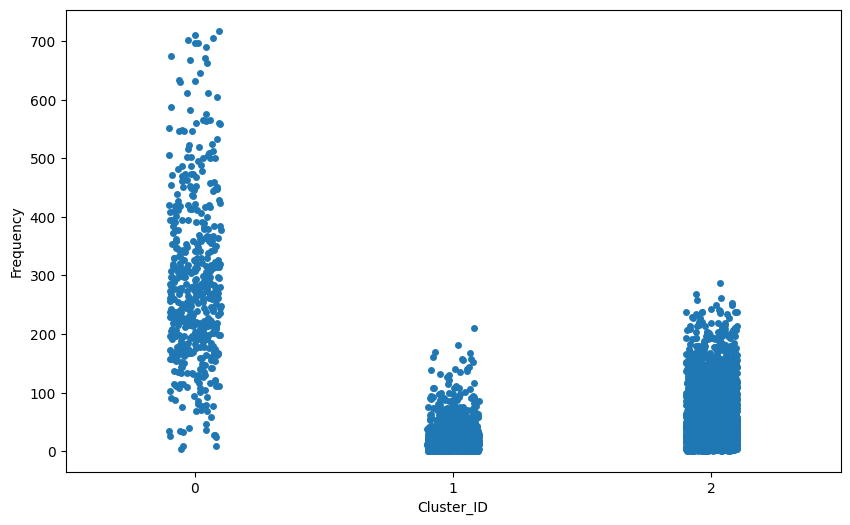

In [49]:
sns.stripplot(x='Cluster_ID', y='Frequency', data=rfm)
plt.savefig("stripplotf.png")

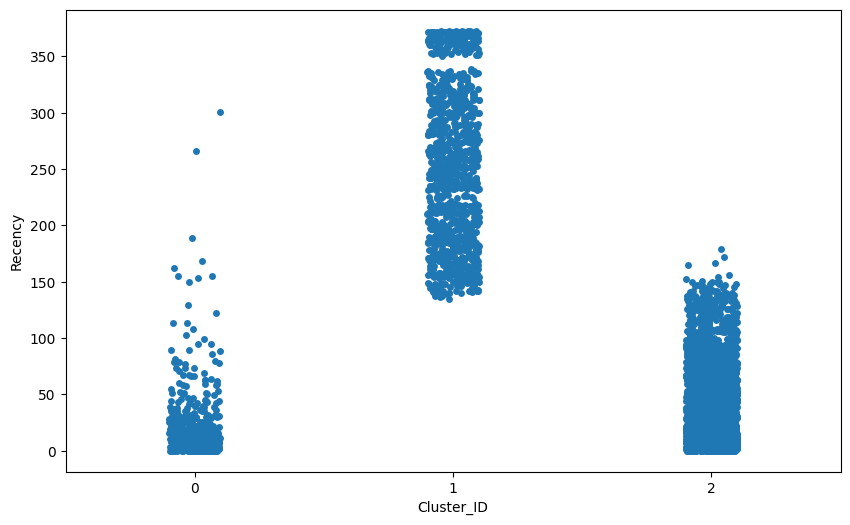

In [50]:
sns.stripplot(x='Cluster_ID', y='Recency', data=rfm)
plt.savefig("stripplotr.png")